In [32]:
import pandas as pd                   # For data manipulation (tables)
import matplotlib.pyplot as plt       # For plotting graphs
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text to numbers
from sklearn.linear_model import LogisticRegression   # Machine learning model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Evaluation
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [33]:
# Load CSV files
true_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')
print(true_news.head())
print(fake_news.head())


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
                                               title  \
0   Donald Trump Sends Out Embarrassing Ne

In [34]:
#What columns exist? How many rows? Are there missing values?
print(true_news.info())
print(fake_news.info())
print(true_news.isnull().sum())
print(fake_news.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None
title      0
text       0
subject    0
date       0
dtype: int64
title      0
text       0
subject    0
date       0
dtype: int64


In [35]:
true_news['label']=1
fake_news['label']=0
data=pd.concat([true_news,fake_news],ignore_index=True)

In [36]:
#How balanced is the dataset? (How many real vs fake?)
print(data['label'].value_counts())

label
0    23481
1    21417
Name: count, dtype: int64


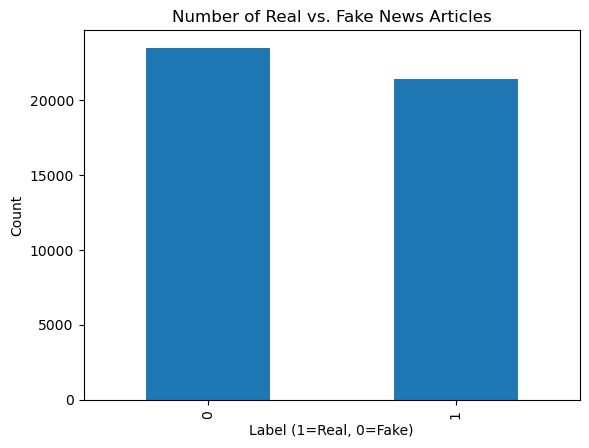

In [37]:
# Visualize number of real vs. fake articles
data['label'].value_counts().plot(kind='bar')
plt.title('Number of Real vs. Fake News Articles')
plt.xlabel('Label (1=Real, 0=Fake)')
plt.ylabel('Count')
plt.show()

In [38]:
#Are there other variables in the data we could use to improve the model (like title, subject, or date)?
X = data['text']  # Feature: just the news text
y = data['label'] # Target: fake or real


In [39]:
#Is 20% enough for testing? What happens if I use a different split, like 30%?
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [41]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [42]:
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9863028953229399
Confusion Matrix:
 [[4573   77]
 [  46 4284]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4650
           1       0.98      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [43]:
cm = confusion_matrix(y_test, y_pred)

In [51]:
plt.figure(figsize=(6, 5))

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

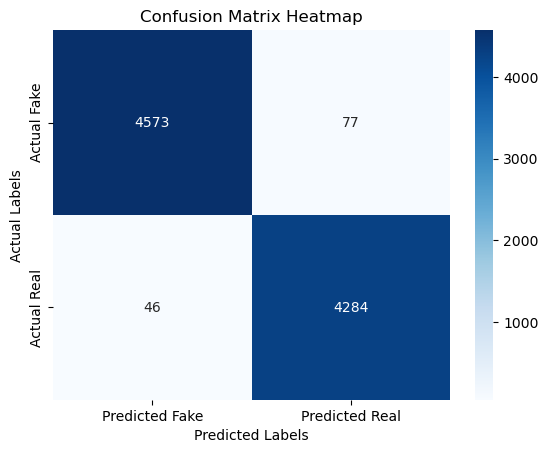

In [52]:
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted Fake', 'Predicted Real'],
    yticklabels=['Actual Fake', 'Actual Real']
)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()